In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
wine = pd.read_csv('wine.data.txt',names=['Class','Alcohol','MalicAcid','Ash','AlcofAsh','Mg','Totphen','Flv','NFP','Proan','ColInt',
                                          'Hue','OD--Dilwine','Proline'])

In [3]:
wine.head()

,Class,Alcohol,MalicAcid,Ash,AlcofAsh,Mg,Totphen,Flv,NFP,Proan,ColInt,Hue,OD--Dilwine,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
MalicAcid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
AlcofAsh,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Totphen,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flv,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
NFP,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proan,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class          178 non-null int64
Alcohol        178 non-null float64
MalicAcid      178 non-null float64
Ash            178 non-null float64
AlcofAsh       178 non-null float64
Mg             178 non-null int64
Totphen        178 non-null float64
Flv            178 non-null float64
NFP            178 non-null float64
Proan          178 non-null float64
ColInt         178 non-null float64
Hue            178 non-null float64
OD--Dilwine    178 non-null float64
Proline        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
wine.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

# Objective -  Dimensionality Reduction through Principal Component Analysis on the Wine data set.

The dimentionality reduction can be done directly by using PCA function, but in this project we will demonstrate the step by step approach of how PCA reaches its final principal components and also describe the parameter to choose number pf principal components

The Step by Step approach to get the principal components are given below with respect to the wine dataset

## 1.	Standardize the d-dimensional dataset.

In [7]:
#Splitting the data into dependent and independent variables

x= wine.drop('Class', axis=1)
y= wine.Class

In [8]:
#Splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)

#Standardizing the x_train and x_test
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

## 2.	Construct the covariance matrix.

In [9]:
#We will make covariance matrix using multiple columns which will make 13*13 matrix

cov_mat = np.cov(x_train_std.T)
print('Covariance Matrix:\n')
pd.DataFrame(cov_mat)

Covariance Matrix:



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.008130,0.096953,0.227389,-0.275084,0.269558,0.235365,0.176355,-0.106197,0.083915,0.526589,-0.127941,0.038045,0.587832
1,0.096953,1.008130,0.149770,0.314273,0.009054,-0.327302,-0.400049,0.251178,-0.142756,0.240464,-0.609794,-0.373695,-0.187304
2,0.227389,0.149770,1.008130,0.458301,0.389166,0.106299,0.078435,0.170165,0.011716,0.228964,-0.074566,0.007068,0.238553
3,-0.275084,0.314273,0.458301,1.008130,-0.037761,-0.305006,-0.347292,0.294066,-0.160245,0.039068,-0.281778,-0.265257,-0.436090
4,0.269558,0.009054,0.389166,-0.037761,1.008130,0.157458,0.139934,-0.162506,0.174812,0.282324,-0.053770,-0.012655,0.418530
5,0.235365,-0.327302,0.106299,-0.305006,0.157458,1.008130,0.874138,-0.424767,0.640804,-0.129229,0.475100,0.723500,0.439876
6,0.176355,-0.400049,0.078435,-0.347292,0.139934,0.874138,1.008130,-0.544010,0.659196,-0.230606,0.579895,0.794950,0.415790
7,-0.106197,0.251178,0.170165,0.294066,-0.162506,-0.424767,-0.544010,1.008130,-0.334451,0.190302,-0.274434,-0.540646,-0.264144
8,0.083915,-0.142756,0.011716,-0.160245,0.174812,0.640804,0.659196,-0.334451,1.008130,-0.053892,0.293701,0.503793,0.285637
9,0.526589,0.240464,0.228964,0.039068,0.282324,-0.129229,-0.230606,0.190302,-0.053892,1.008130,-0.546602,-0.455576,0.288943


## 3.	Decompose the covariance matrix into its eigenvectors and eigenvalues.

In [10]:
#Calculation of eigen value and eigen vector
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

#Print Eigen Values
print('\nEigen values: \n', eigen_vals)

#Eigen values represent the magnitude


Eigen values: 
 [4.60904624 2.58694581 1.48342648 1.01296796 0.80274502 0.67220992
 0.55435313 0.10226076 0.3440145  0.3179616  0.17356328 0.23908289
 0.20711346]


In [11]:
#Print Eigen Vectors, this represent the direction
print('\nEigen Vector\n')
pd.DataFrame(eigen_vecs)


Eigen Vector



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.090411,-0.476735,0.232385,-0.006533,-0.294327,-0.343637,0.065967,0.028118,-0.548782,-0.164379,-0.179305,-0.358245,-0.109431
1,0.252988,-0.176995,-0.140683,-0.591582,0.001427,-0.252437,-0.546378,0.002873,-0.127716,-0.033814,0.175765,0.296933,0.190071
2,0.016027,-0.323900,-0.589064,0.296520,-0.119851,-0.229368,-0.016998,-0.147944,0.141526,0.019954,-0.092880,0.314296,-0.492873
3,0.230411,0.027079,-0.626868,-0.047533,-0.005842,-0.069105,0.388540,0.136527,-0.066034,-0.241561,-0.013662,-0.276533,0.487003
4,-0.080085,-0.384358,-0.160652,0.243279,0.667355,0.269757,-0.283564,0.035819,-0.237759,0.201738,0.079236,-0.225976,0.080425
5,-0.402269,-0.087816,-0.137019,-0.148102,-0.217031,0.083691,0.013088,-0.477169,-0.006349,0.478329,-0.354914,0.044368,0.388613
6,-0.432027,-0.027137,-0.127368,-0.115295,-0.102129,0.012096,0.045346,0.812506,-0.046297,0.252342,-0.068729,0.199377,-0.002585
7,0.293968,-0.010532,-0.098881,0.266502,-0.596029,0.397558,-0.422627,0.142698,0.023466,0.179232,0.105490,-0.272754,0.046841
8,-0.307128,-0.075415,-0.182650,-0.416587,-0.063870,0.590581,-0.019477,-0.105234,-0.026084,-0.484096,-0.050105,-0.083022,-0.290391
9,0.142639,-0.482877,0.158717,-0.063338,-0.131994,0.274933,0.477130,-0.052833,-0.014899,0.164727,0.518372,0.298570,0.092824


## 4.	Select k eigenvectors that correspond to the k largest eigenvalues,  where k is the dimensionality of the new feature subspace ( k≤d ).

In [12]:
eigen_pairs = []

for i in range(len(eigen_vals)):
    eigen_pairs.append([np.abs(eigen_vals[i]), eigen_vecs[:,i]])

eigen_pairs.sort(reverse=True) #The sorting will help to get the best eigen value at the top

In [13]:
k = input('Enter the k value:')
k = int(k)

if k <= 13:
    temp = k-1
    print('\nEigen Value is : \n', eigen_pairs[temp][0])
    print('\nand Corresponding Eigen Vector is: \n', eigen_pairs[temp][1])
else:
    print('The value entered is greater than number of features')

Enter the k value:1

Eigen Value is : 
 4.609046238846975

and Corresponding Eigen Vector is: 
 [-0.09041052  0.25298779  0.01602653  0.23041073 -0.08008494 -0.40226932
 -0.43202681  0.29396827 -0.30712828  0.14263937 -0.32126087 -0.39611073
 -0.24164525]


## 5.	Construct a projection matrix W from the "top" k eigenvectors.

In [14]:
# Before calculating the projection matrix W, lets see how much of the variance can be explained by less components
#For that we need to calculate explained variance ratio and cumulative variance ratio

#Sum of all eigen values
total = sum(eigen_vals)

#Sort eigen values in decending order to get the best value at top
eigen_vals = list(eigen_vals)
eigen_vals.sort(reverse=True)

#Explained variance ratio
#var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

var_exp = []
for i in eigen_vals:
    var_exp.append(i/total)

#Cumulative Explained Variance Ratio
cum_var_exp = np.cumsum(var_exp)

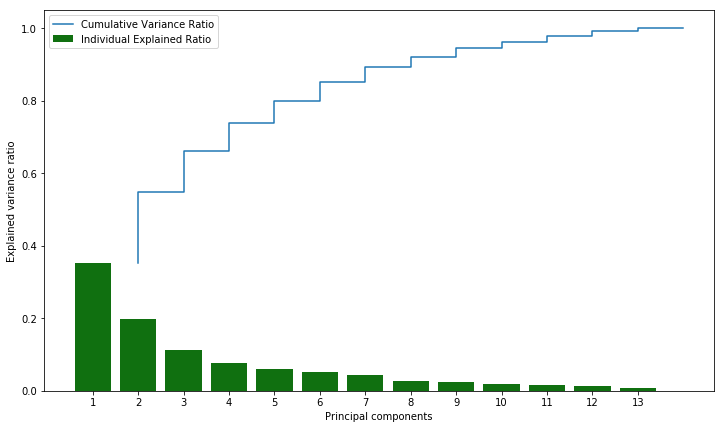

In [15]:
#Now Lets plot them on the graph against the number of components to get the picture of what number of columns explains how much 
#variance

plt.figure(figsize=(12,7))
sns.barplot(x= np.arange(1,14), y=var_exp,color='g', label='Individual Explained Ratio')
sns.lineplot(x= np.arange(1,14), y=cum_var_exp, drawstyle='steps-pre', label= 'Cumulative Variance Ratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [16]:
k = input('Enter the number of pricipal components: ')
k = int(k)

print('\nThe ',k,' components explaines ', (round(cum_var_exp[k],4)*100), '% variance in the dataset')

Enter the number of pricipal components: 4

The  4  components explaines  80.08 % variance in the dataset


Top four eigen values explains the 80.08% of the variance in the model, so we will use 4 principal components in the modelling. Now we will create projection matrix W for top 4 eigen values

In [17]:
#eigen pairs has already been sorted so top 4 eigen vectors are for the best 4 eigen values
w= np.array(pd.DataFrame({0:eigen_pairs[0][1],1:eigen_pairs[1][1],2:eigen_pairs[2][1],3:eigen_pairs[3][1]}))

print('W Matrix is : \n', w)

W Matrix is : 
 [[-0.09041052 -0.47673487  0.23238477 -0.00653254]
 [ 0.25298779 -0.17699549 -0.14068315 -0.5915821 ]
 [ 0.01602653 -0.3238999  -0.58906416  0.29652032]
 [ 0.23041073  0.02707893 -0.6268684  -0.04753301]
 [-0.08008494 -0.38435766 -0.16065207  0.24327871]
 [-0.40226932 -0.0878164  -0.1370189  -0.14810192]
 [-0.43202681 -0.02713712 -0.12736772 -0.11529495]
 [ 0.29396827 -0.01053185 -0.09888055  0.26650234]
 [-0.30712828 -0.07541547 -0.18264994 -0.4165868 ]
 [ 0.14263937 -0.48287748  0.15871686 -0.06333815]
 [-0.32126087  0.2547302  -0.06303092  0.4026246 ]
 [-0.39611073  0.11157837 -0.15071199 -0.11710444]
 [-0.24164525 -0.40406288  0.17442128  0.20246685]]


## 6.	Transform the d-dimensional input dataset x using the projection matrix W to obtain the new k-dimensional feature subspace

In [18]:
# Now to create principal component, it is just the matter of dot multiplication of standardized dataset with projection matrix w

x_train_pca = x_train_std.dot(w)
x_test_pca = x_test_std.dot(w)

In [19]:
pd.DataFrame(x_train_pca).head() #This is the training dataset for modelling

,0,1,2,3
0,0.957490,2.175798,0.093707,0.609160
1,-2.550131,-1.090312,-1.018142,0.591996
2,-2.322133,-1.142327,-1.179062,0.990723
3,-1.396600,1.400550,-1.756073,-3.500345
4,2.889224,-0.109286,1.183957,0.770093


In [20]:
x_train_pca.shape #Shape of new train dataset

(124, 4)

In [21]:
pd.DataFrame(x_test_pca).head() #This is the test dataset for testing

,0,1,2,3
0,2.141924,-1.095473,0.145489,1.093364
1,-0.204226,1.700479,-0.861102,0.236013
2,-2.202638,-1.474316,0.169427,-0.514937
3,-2.099270,0.635164,0.895397,0.498790
4,-2.254636,-2.399471,-0.045967,1.299334


In [22]:
x_test_pca.shape #Shape of new test dataset

(54, 4)

# Creating Model using these PCAs

In [23]:
#Take an example of Logistic regression model

logreg = LogisticRegression()
logreg.fit(x_train_pca, y_train)
ypred = logreg.predict(x_test_pca)
logacc = metrics.accuracy_score(y_test, ypred)

print('The accuracy for PCA components using Linear Model is : %1.4f' %(logacc))

The accuracy for PCA components using Linear Model is : 0.9630


In [24]:
#The confusion matrix

metrics.confusion_matrix(y_test,ypred)

array([[23,  0,  0],
       [ 2, 17,  0],
       [ 0,  0, 12]], dtype=int64)

In [25]:
#Classification Report

print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        23
           2       1.00      0.89      0.94        19
           3       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



As you can see by using only 4 columns instead of 13, we are able to get 96% accuracy score